<a href="https://colab.research.google.com/github/satyam372/Alzheimer-Detection/blob/main/Alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pathlib
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from google.colab import drive


In [30]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
file_path = '/content/drive/MyDrive/Dataset'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

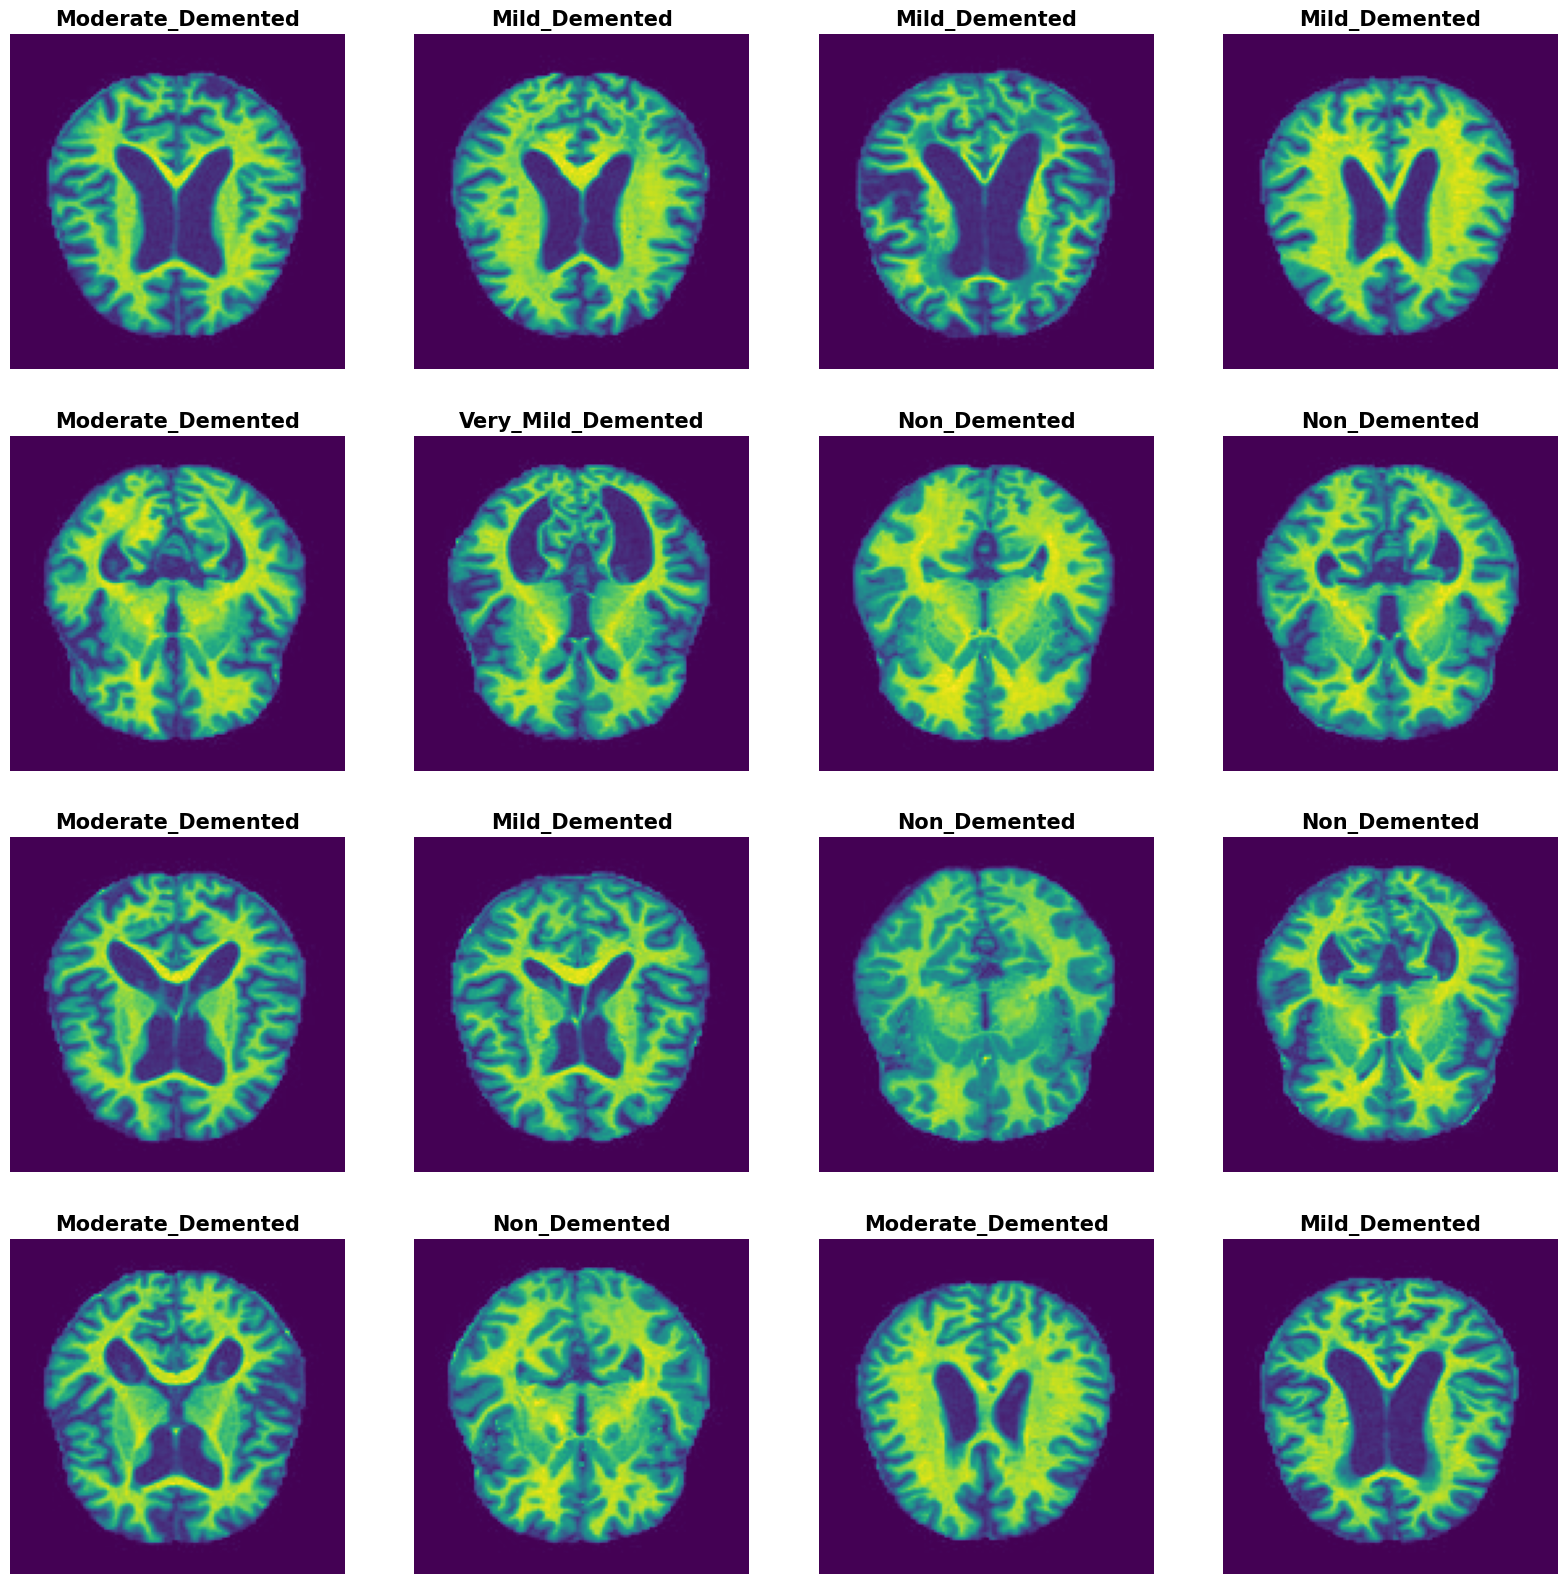

In [32]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize=15, fontweight='bold')
    plt.imshow(image)

In [33]:
SEED = 1
BATCH_SIZE = 32
IMG_SIZE = (128, 128)
INPUT_SHAPE = IMG_SIZE + (3,)


In [34]:
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset='training'
)

Found 827 files belonging to 4 classes.
Using 662 files for training.


In [35]:
X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset='validation'
)

Found 827 files belonging to 4 classes.
Using 165 files for validation.


In [53]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)       

In [54]:
history = model.fit(X_train, epochs = 50, validation_data=X_validation, verbose=1)

Epoch 1/50
21/21 [==============================] - 14s 546ms/step - loss: 1.1592 - accuracy: 0.5650 - val_loss: 0.8730 - val_accuracy: 0.7394
Epoch 2/50
21/21 [==============================] - 15s 733ms/step - loss: 0.6924 - accuracy: 0.7689 - val_loss: 0.6037 - val_accuracy: 0.7515
Epoch 3/50
21/21 [==============================] - 12s 552ms/step - loss: 0.5113 - accuracy: 0.8233 - val_loss: 0.5085 - val_accuracy: 0.7758
Epoch 4/50
21/21 [==============================] - 13s 615ms/step - loss: 0.4290 - accuracy: 0.8384 - val_loss: 0.3712 - val_accuracy: 0.8424
Epoch 5/50
21/21 [==============================] - 14s 680ms/step - loss: 0.3169 - accuracy: 0.8927 - val_loss: 0.2838 - val_accuracy: 0.8667
Epoch 6/50
21/21 [==============================] - 14s 657ms/step - loss: 0.2616 - accuracy: 0.9139 - val_loss: 0.2646 - val_accuracy: 0.9030
Epoch 7/50
21/21 [==============================] - 14s 631ms/step - loss: 0.1737 - accuracy: 0.9411 - val_loss: 0.3342 - val_accuracy: 0.8424

In [55]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

6/6 [==============================] - 1s 108ms/step - loss: 0.1772 - accuracy: 0.9394
Accuracy: % 93.94
Loss: % 17.72


[]

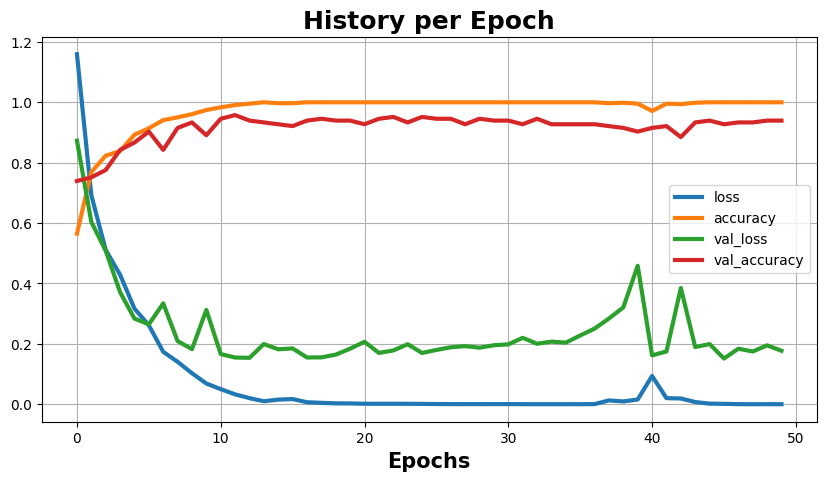

In [56]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
import pandas as pd
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()